In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
train_data_set = pd.read_csv('./digit-recognizer/train.csv', header=0)
train_data_frames = pd.DataFrame(train_data_set)
print(train_data_frames)
train_array = np.array(train_data_frames.values)
print(train_array[:,1])

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [33]:
test_data_set = pd.read_csv('./digit-recognizer/test.csv', header=0)
test_data_frames = pd.DataFrame(test_data_set)
print(test_data_frames)
test_data = np.array(test_data_frames.values)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27995       0       0       0       0       0       0       0       0       0   
27996       0       0       0       0       0       0       0       0       0   
27997       0       0       0       0       0       0       0       0       0   
27998       0       0       0       0       0       0       0       0       0   
27999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [23]:
train_label = train_array[:,0]
train_data = train_array[:,1:]

In [34]:
print(len(train_label))
print(train_data.shape)
print(test_data.shape)

42000
(42000, 784)
(28000, 784)


In [29]:
print(train_data[0:1,:].reshape(28,28))
single_data = train_data[3:4,:].reshape(28,28)
print(single_data.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0 188 255  94   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0 191 250 253  93   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  123 248 253 167  10   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80
  247 253 208  13   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [35]:
print(test_data[0:1,:].reshape(28,28))
single_data_test = test_data[0:1,:].reshape(28,28)
print(single_data_test.shape)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  10  17  17  17  17  81 180 180
   35   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 139 253 253 253 253 253 253 253
   48   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  60 228 253 253 253 253 253 253 253
  207 197  46   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 213 253 253 253 253 253 253 253 253
  253 253 223  52   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  66 231 253 253 253 108  4

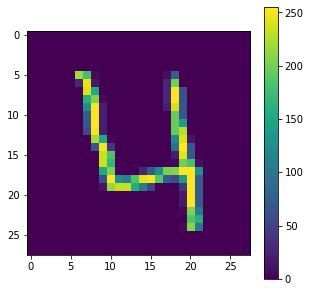

In [30]:
#plt.figure()
plt.figure(figsize=(5,5))
plt.imshow(single_data)
plt.colorbar()
plt.grid(False)
plt.show()

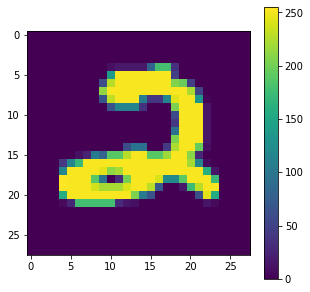

In [36]:
#plt.figure()
plt.figure(figsize=(5,5))
plt.imshow(single_data_test)
plt.colorbar()
plt.grid(False)
plt.show()